(sec:pymongo)=
# Requêtes depuis Python : `pymongo`

* Auteurs : Pierre Cottais, Tom Houée, Florian Guillaume

**Comment faire pour effectuer les requêtes présentes dans les chapitres 1 à 6 avec `pymongo` ?**


**Sommaire :**


1. [Présentation et installation](#partie1)
2. [Connexion serveur, base de données et collections](#partie2)
3. [Requêtes](#partie3)  
  3.1. [Requêtes simple et ces spécifictés](#partie31)  
  3.2. [Les Index](#partie32)  
  3.3. [Requête d'aggrégation](#partie33)  
  3.4. [Requête de modifications](#partie34)  
4. [Pour aller plus loin...](#partie4)  
  4.1. [Export au format JSON](#partie41)  
  4.2. [Exercices et corrections](#partie42)

## Présentation et installation <a id="partie1"></a>
PyMongo est une librairie Python contenant des outils pour travailler avec MongoDB et MongodbAtlas. PyMongo est maintenue par les développeurs de MongoDB officiel ce qui en fait la référence dans Python. Pour une documentation détaillée de la librairie, vous pouvez consulter la documentation :

**https://pymongo.readthedocs.io/en/stable/**

Pour installer la librairie, nous pouvons le faire avec la commande `pip install pymongo`, dans un terminal tel que Anaconda Prompt par exemple.

In [1]:
import pymongo 

```{admonition} Remarque
Cette librairie est déjà incluse dans la distribution Anaconda.
```



## Connexion serveur, base de données et collections <a id="partie2"></a>
La première étape consiste à créer une connexion avec nos bases de données sur le serveur de MongoDB. Pour effectuer cette connexion, nous devons utiliser une URI qui est un URL. Il  existe différentes URI de connexion, mais ici, nous devons juste nous connecter à notre serveur local MongoDB. Pour voir les différents moyens de vous connecter à des serveurs extérieurs comme par exemple MongodbAtlas, voir la page : 

**https://docs.mongodb.com/manual/reference/connection-string/.**

Ainsi notre URL de connexion est "mongodb://localhost:27017" avec notre :
* chaine de connexion : mongodb://
* host: localHost
* port: 27017.  

Pour utiliser cette URL nous utilisons la classe MongoClient de pymongo qui nous fait notre connexion.

In [2]:
# import de notre Classe MongoClient
from pymongo  import MongoClient

client = MongoClient(host="localhost", port=27017)

# ou bien 

db_uri = "mongodb://localhost:27017/"
client = MongoClient(db_uri)

# affichage un objet
print(client)

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)


In [3]:
print(type(client))

<class 'pymongo.mongo_client.MongoClient'>


Ainsi, nous pouvons voir que la fonction créer un objet de class `pymongo.mongo_client.MongoClient` où nous retrouvons nos informations comme le host le port, etc...
La deuxième étape consiste à nous connecter à notre base de données et nos collections, nous prendons ici l'exemple de la base de données `food`:

```{admonition} Syntax
:class: tip

* Client.BasedeDonnee.Collection   
* Client["BasedeDonnee"]["Collection"]
```

In [4]:
db_name = "food"
db = client[db_name]

# ou bien

db = client.food

print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'food')


In [5]:
print(type(db))

<class 'pymongo.database.Database'>


Ainsi, il nous retourne un objet de classe `pymongo.database.Database`.  
Enfin, il ne nous reste plus qu'à récupérer la collection souhaitée. Cela est le même principe pour utiliser les collections et qui cette fois nous retourne un objet `pymongo.collection.Collection`. Ici, nous prenons l'exemple de la collection `NYfood`.

In [6]:
coll_name = "NYfood"
coll = db[coll_name]

# même syntax qu'auparavant

coll = db.NYfood

print(coll)

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'food'), 'NYfood')


In [7]:
print(type(coll))

<class 'pymongo.collection.Collection'>


De plus, `pymongo` a une fonction bien pratique qui permet d'afficher la liste des collection contenues dans une base de données :

In [8]:
db.list_collection_names()

['NYfood']

En résumé, le package `pymongo` vous permet d'utiliser trois types d'objets via votre IDE python : les clients, les bases de données et les collections. Ces objets vont avoir des méthodes attitrées nous permettant d'effectuer des requêtes, nous les détaillerons dans la suite du cours.

```{admonition} Remarque

Cela fonctionne comme un dictionnaire Python. Toutefois, si votre base contient des caractères spéciaux, espace ou autre, on vous conseille la première écriture : `Client["BasedeDonnee"]["Collection"]`.
```



## Requêtes <a id="partie3"></a>
Maintenant que nous avons fait nos connexions, il nous reste à voir comment effectuer des requêtes.

**Fonctionnement :**
Le fonctionement est le même que sur l'interface MongoDB:

```{admonition} Syntax requête
:class: tip

 * Client.BasedeDonne.nomDeLaCollection.requete()    
 * Client["BasedeDonnee"]["Collection"].requete()
```

|Requête|Fonctionement|
|------|--------|
|    find()    |    Recherche de tous les individus selon les critères indiqués    |
|    find_one()   |    Affichage du premier individu correspondant aux critères indiqués    |

Mais le résultat est différent, il nous renvoie un objet de type `Cursor`. En effet, le module `pymongo` ne stockera pas les résultats dans une liste par souci de mémoire : 

Par exemple, ici nous récupérons toutes les boulangeries de la collection `NYfood`.

In [9]:
db.NYfood.find({"cuisine": "Bakery"})

Ainsi, pour accéder au contenu de la requête il nous faut parcourir l'objet renvoyé par celle-ci, comme un objet itérable en Python.
Exemple, on affiche les deux premiers individus issus de la requête.

In [10]:
cursor = db.NYfood.find({"cuisine": "Bakery"})

# afficher les 2 premiers individus
for rep in cursor[:2]:    
  print(rep)

{'_id': ObjectId('6086704a6021b46bfb4dbbc8'), 'address': {'building': '1007', 'loc': {'type': 'Point', 'coordinates': [-73.856077, 40.848447]}, 'street': 'Morris Park Ave', 'zipcode': '10462'}, 'borough': 'Bronx', 'cuisine': 'Bakery', 'grades': [{'date': datetime.datetime(2014, 3, 3, 0, 0), 'grade': 'A', 'score': 2}, {'date': datetime.datetime(2013, 9, 11, 0, 0), 'grade': 'A', 'score': 6}, {'date': datetime.datetime(2013, 1, 24, 0, 0), 'grade': 'A', 'score': 10}, {'date': datetime.datetime(2011, 11, 23, 0, 0), 'grade': 'A', 'score': 9}, {'date': datetime.datetime(2011, 3, 10, 0, 0), 'grade': 'B', 'score': 14}], 'name': 'Morris Park Bake Shop', 'restaurant_id': '30075445'}
{'_id': ObjectId('6086704a6021b46bfb4dbbeb'), 'address': {'building': '120', 'loc': {'type': 'Point', 'coordinates': [-73.9998042, 40.7251256]}, 'street': 'Prince Street', 'zipcode': '10012'}, 'borough': 'Manhattan', 'cuisine': 'Bakery', 'grades': [{'date': datetime.datetime(2014, 10, 17, 0, 0), 'grade': 'A', 'score':

Nous pouvons afficher l'ensemble des réponses, mais cela peut demander beaucoup de mémoire pour votre ordinateur en fonction de la requête demandée. Pour ce faire, on utilise la ligne suivante.
```python
print(list(cursor))
```

Il est donc préférable d'afficher les premiers résultats pour voir si votre requête est juste. Par exemple avec la requête `find_one()` affiche que le premier individu correspondant aux critères indiqués, comme par exemple, la première boulangerie de la collection :

In [11]:
db.NYfood.find_one({"cuisine": "Bakery"})

{'_id': ObjectId('6086704a6021b46bfb4dbbc8'),
 'address': {'building': '1007',
  'loc': {'type': 'Point', 'coordinates': [-73.856077, 40.848447]},
  'street': 'Morris Park Ave',
  'zipcode': '10462'},
 'borough': 'Bronx',
 'cuisine': 'Bakery',
 'grades': [{'date': datetime.datetime(2014, 3, 3, 0, 0),
   'grade': 'A',
   'score': 2},
  {'date': datetime.datetime(2013, 9, 11, 0, 0), 'grade': 'A', 'score': 6},
  {'date': datetime.datetime(2013, 1, 24, 0, 0), 'grade': 'A', 'score': 10},
  {'date': datetime.datetime(2011, 11, 23, 0, 0), 'grade': 'A', 'score': 9},
  {'date': datetime.datetime(2011, 3, 10, 0, 0), 'grade': 'B', 'score': 14}],
 'name': 'Morris Park Bake Shop',
 'restaurant_id': '30075445'}

De plus, puisque notre réponse est un dictionnaire et que nous connaissons la structure, alors nous pouvons aller chercher les informations qui nous intéressent.
Ainsi, nous récupérons ci-dessous la localisation et les coordonnées du premier individu issu de notre requête :

In [12]:
cursor = db.NYfood.find({"cuisine": "Bakery"})
cursor=list(cursor)
print(cursor[0]["address"]["loc"]["coordinates"])

[-73.856077, 40.848447]


**Methodes :**

De plus, pour utiliser certaines méthodes sur nos requêtes comme `sort()`, c'est sensiblement la même syntaxe que MongoDB :

```{admonition} Syntax méthode
:class: tip

* Client.BasedeDonnee.Collection.requetes().methode()    
* Client["BasedeDonnee"]["Collection"].requete().methode()
```

Cependant, nous ne pouvons pas utiliser ces méthodes à l'objet `Cursor` car ces méthodes font partie intégrante de la requête.

|Méthodes Python|Fonctionalité|
|------|----------|
|    sort()    |    Tri des individus    |
|    count()   |    Comptage du nombre d'individus issus de la requête    |
|    limit()    |    Affichage des n premiers individus souhaités    |
|    explain()    |    Permet d’obtenir un certain nombre d’informations sur le déroulement d’une requête |
|    distinct()    |    Suppression des doublons    |
    

**Exemples :**
```python
db.NYfood.find({"cuisine": "Bakery"}).limit(2) # Affiche les deux premiers résultats
db.NYfood.find({"cuisine": "Bakery"}).sort("name", -1)) # Trie les résultats par ordre décroissant par rapport à la variable name
db.NYfood.find({"cuisine": "Bakery"}).limit(2).explain("executionStats") # Affiche les informations 
db.NYfood.distinct("grades.grade", {"cuisine": "Bakery"}) #  liste des notes attribuées aux boulangeries
```



### Requêtes simples et ses spécifictés <a id="partie31"></a>
L'utilisation de `pymongo` implique l'utilisation de certaines spécificités, deux principalement qui marquent une différence avec MongoDB.
Premièrement, nous avons une spécificité avec les opérateurs et les noms qui doivent toujours être entre guillemets comme par exemple ```$gte```.

Exemple :

In [13]:
db.NYfood.find_one({"name": {"$gte" : "Y"}})

{'_id': ObjectId('6086704a6021b46bfb4dbc35'),
 'address': {'building': '72',
  'loc': {'type': 'Point', 'coordinates': [-73.92506, 40.8275556]},
  'street': 'East  161 Street',
  'zipcode': '10451'},
 'borough': 'Bronx',
 'cuisine': 'American ',
 'grades': [{'date': datetime.datetime(2014, 4, 15, 0, 0),
   'grade': 'A',
   'score': 9},
  {'date': datetime.datetime(2013, 11, 14, 0, 0), 'grade': 'A', 'score': 4},
  {'date': datetime.datetime(2013, 7, 29, 0, 0), 'grade': 'A', 'score': 10},
  {'date': datetime.datetime(2012, 12, 31, 0, 0), 'grade': 'B', 'score': 15},
  {'date': datetime.datetime(2012, 5, 30, 0, 0), 'grade': 'A', 'score': 13},
  {'date': datetime.datetime(2012, 1, 9, 0, 0), 'grade': 'A', 'score': 10},
  {'date': datetime.datetime(2011, 8, 15, 0, 0), 'grade': 'C', 'score': 37}],
 'name': 'Yankee Tavern',
 'restaurant_id': '40365499'}

La deuxième spécificité concerne les dates. On utilise le module ```datetime``` et `pymongo` va de lui même effectuer la conversion au format "date de MongoDb".
Exemple, liste des restaurants ayant au moins une note postérieure au 20 janvier 2015 :

In [14]:
from datetime import datetime

date = datetime.strptime("2015-01-20", "%Y-%m-%d")

db.NYfood.find({"grades.date": {"$gte": date}})

**Astuce :**

Dans le but de rendre nos requêtes plus lisibles, il est possible de créer des variables Python qui correspondent aux conditions que nous utilisons pour nos requêtes.
Par exemple, nous voulons afficher la liste des restaurants qui vérifient l’une des conditions suivantes :  
* le restaurant appartient aux quartiers de "Manhattan"
* le restaurant est une boulangerie du Bronx commençant par la lettre "P"

In [15]:
db = client["food"]
coll = db["NYfood"]

# première condition
dico_cond1 = {}
dico_cond1["borough"] = "Manhattan"

# deuxième condition
dico_cond2 = {}
dico_cond2["borough"] = "Bronx"
dico_cond2["cuisine"] = "Bakery"
dico_cond2["name"] = {"$gte": "P", "$lt": "Q"}

# Notre requête final
req = {}
req["$or"] = [dico_cond1, dico_cond2]

cursor = coll.find(req)
cursor = list(cursor)
print(cursor[0])

{'_id': ObjectId('6086704a6021b46bfb4dc17e'), 'address': {'building': '831', 'loc': {'type': 'Point', 'coordinates': [-73.90503799999999, 40.812633]}, 'street': 'East 149 Street', 'zipcode': '10455'}, 'borough': 'Bronx', 'cuisine': 'Bakery', 'grades': [{'date': datetime.datetime(2014, 1, 15, 0, 0), 'grade': 'A', 'score': 12}, {'date': datetime.datetime(2013, 1, 3, 0, 0), 'grade': 'A', 'score': 10}], 'name': 'Pitusa Bakery', 'restaurant_id': '40510823'}


Forme plus brutale :

In [16]:
cursorbis = coll.find({"$or": [{"borough": "Manhattan"}, 
			     {"cuisine": "Bakery", "borough": "Bronx", "name": {"$gte": "P", "$lt": "Q"}}
			     ]})
cursorbis = list(cursorbis)
print(cursorbis[0])

{'_id': ObjectId('6086704a6021b46bfb4dc17e'), 'address': {'building': '831', 'loc': {'type': 'Point', 'coordinates': [-73.90503799999999, 40.812633]}, 'street': 'East 149 Street', 'zipcode': '10455'}, 'borough': 'Bronx', 'cuisine': 'Bakery', 'grades': [{'date': datetime.datetime(2014, 1, 15, 0, 0), 'grade': 'A', 'score': 12}, {'date': datetime.datetime(2013, 1, 3, 0, 0), 'grade': 'A', 'score': 10}], 'name': 'Pitusa Bakery', 'restaurant_id': '40510823'}


De plus, nous pouvons remarquer que ce sont deux listes `Cursor`, on peut donc tester l'égalité de leur contenu.

In [17]:
print(cursorbis == cursor)

True


### Les index <a id="partie32"></a>
Les index sont des structures de données spéciales qui stockent une petite partie de l'ensemble de données de la collection sous une forme facile à parcourir. L'index stocke la valeur d'un champ spécifique ou d'un ensemble de champs, triés par la valeur du champ. Ainsi, l'utilisation avec `pymongo` est la même qu'en mongoDB.

```{admonition} Syntax de requête d'index
:class: tip

* Client.BasedeDonnee.Collection.requeteIndex()    
* Client["BasedeDonnee"]["Collection"].requeteIndex()
```

|Requete|Fonctionement|
|--------|--------|
|    index_information()    |  Pour obtenir la liste des index de la collection      |
|    create_index()   |    Création d'un index   |
|  drop_index()     | Suppression d'un index      |

**Exemple :**

L'ensemble des index de la collection `NYfood` :

In [18]:
db = client["food"]
coll = db["NYfood"]

for k, v  in coll.index_information().items():
    print(" Nom : {}, Valeur : {} \n".format(k, v))

 Nom : _id_, Valeur : {'v': 2, 'key': [('_id', 1)]} 

 Nom : address.loc_2dsphere, Valeur : {'v': 2, 'key': [('address.loc', '2dsphere')], '2dsphereIndexVersion': 3} 

 Nom : $**_text, Valeur : {'v': 2, 'key': [('_fts', 'text'), ('_ftsx', 1)], 'weights': SON([('$**', 1)]), 'default_language': 'english', 'language_override': 'language', 'textIndexVersion': 3} 

 Nom : borough_1, Valeur : {'v': 2, 'key': [('borough', 1.0)]} 

 Nom : cuisine_1, Valeur : {'v': 2, 'key': [('cuisine', 1.0)]} 



Exemple de suppression ou de création d'un index :
```python
db.NYfood.drop_index("borough_1")
db.NYfood.create_index("borough_1")
```


### Les requêtes d'agrégation <a id="partie33"></a>
Les requêtes d'agrégation ont pour but de faire des calculs simples (agrégats) sur toute la collection ou seulement sur certains groupes. Pour ce faire, on utilise la méthode ```aggregate()``` .

```{admonition} Syntax de la requête d'aggregation
:class: tip

* Client.BasedeDonnee.Collection.aggregate()   
* Client["BasedeDonnee"]["Collection"].aggregate()
```

Dans l'exemple ci-dessous, on souhaite compter le nombre de restaurants dans la collection en les regroupant par quartier.

In [19]:
# aggrégation
cursor_agreg = coll.aggregate([
  {"$group": {"_id": "$borough",
              "nb_restos": {"$sum": 1}}
  }
])

# affichage
for agreg in cursor_agreg:
    print(agreg["nb_restos"], "restaurants dans le quartier", agreg["_id"])

6085 restaurants dans le quartier Brooklyn
51 restaurants dans le quartier Missing
969 restaurants dans le quartier Staten Island
2338 restaurants dans le quartier Bronx
10258 restaurants dans le quartier Manhattan
5656 restaurants dans le quartier Queens


**Bonus, exemple d'utilisation du résultat d'une agrégation** 

La méthode `aggregate` nous permets de faire des calculs, des regroupement, etc... Mais on a envie d'exploiter ce résultat en créant un graphique ou en le stockant dans un fichier.  
Création d'un graphique montrant, pour chaque valeur possible de note, le nombre de fois qu’elle a été attribuée.

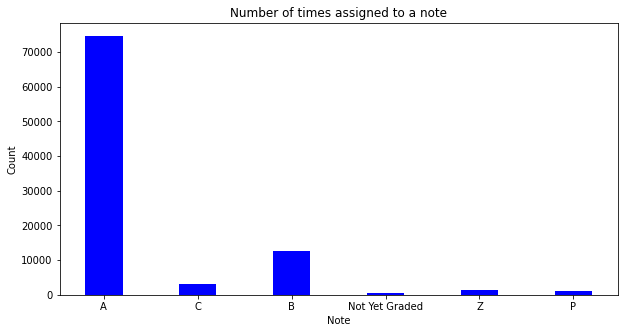

In [20]:
import matplotlib.pyplot as plt

cursor_agrr = client.food.NYfood.aggregate([
                                              {"$unwind": "$grades"},
                                              {"$group": {"_id": "$grades.grade", "nb": {"$sum": 1}}}
                                            ])

# récupérer nos informations                                  
l_nb = []
l_grade = []
for obj in cursor_agrr :
    l_nb.append(obj["nb"])
    l_grade.append(obj["_id"])

# Création du graphe
plt.figure(figsize = (10, 5))
plt.bar(l_grade, l_nb, color ='blue', width = 0.4)
plt.xlabel("Note")
plt.ylabel("Count")
plt.title("Number of times assigned to a note")
plt.show()

### Les modifications <a id="partie34"></a>
Contrairement aux requêtes d'interrogation, les requêtes de modification peuvent modifier la base de données. Avec la librairie `pymongo` l'écriture est la même qu'en MongoDB.

```{admonition} Syntax de requête de modifications
:class: tip

* Client.BasedeDonnee.Collection.requeteModification()   
* Client["BasedeDonnee"]["Collection"].requeteModification()
```

|Requete|Fonctionement|
|--------|--------|
|  insert_one()	|  Insertion d'un seul document  	|
|  insert_many()   |	Insertion d'une liste de documents   |
|  delete_one() 	|   Suppression d'un document	|
|  delete_many() 	|   Suppression d'une liste de documents	|
|  update_one() 	|   Modification d'un document	|
|  update_many() 	|   Modification d'une liste de documents	|
|  replace_one() 	|   Remplacement d'un document	|



Exemple d'insertion d'un document dans la collection `NYfood` :
```python
db.NYfood.insert_one(
  {
	"_id" : ObjectId("nouvel_id_resto"),
	"address" : {
    	"building" : "3",
    	"loc" : {
        	"type" : "Point",
        	"coordinates" : [
            	-1.6773,
            	48.111
        	]
    	},
    	"street" : "Rue du Vau Saint-Germainl",
    	"zipcode" : "35000"
	},
	"borough" : "KilKenny's Pub",
	"cuisine" : "Bar, Pub",
	"grades" : [
    	{
        	"date" : ISODate("2021-04-08T00:00:00.000Z"),
        	"grade" : "A",
        	"score" : 9
    	}
	],
	"name" : "KilKenny's Pub",
	"restaurant_id" : "99999999"
}
)
```

```{admonition} Remarque

Si la collection `NYfood` n'existe pas encore dans la base de données, elle sera automatiquement créée lors de l'insertion d'un document dans cette nouvelle collection. La méthode ```db.create_collection()``` est donc facultative.
```


## Pour aller plus loin... <a id="partie4"></a>
### Export au format JSON <a id="partie41"></a>
Les résultats obtenus après une requête peuvent être conservés dans le but d'un projet ou d'une étude quelconque. Ainsi, nous vous proposons d'enregistrer vos requêtes sous la forme d'un format JSON.

Remarque : le module JSON ne peut écrire dans un fichier avec des données de types classiques comme liste, dictionnaire, nombre, caractère. En l'occurrence, un identifiant qui aura une classe "ObjectID" ne pourra être écrit dans le fichier directement, de même pour les objets ```datetime```. Nous nous devons donc de les convertir en chaîne de caractères au préalable.

In [21]:
import json

cursor = db.NYfood.find({"cuisine": "Bakery"})

cursor = list(cursor[:10])

for elt in cursor:
    elt["_id"] = str(elt["_id"])
    for grade in elt["grades"]:
        grade["date"] = grade["date"].strftime("%Y-%d-%m")
        
dico = {"Bakery" : cursor}

with open("Bakery", 'w', encoding='utf-8') as jsonFile:
    json.dump(dico, jsonFile, indent=4)

### Exercices et corrections <a id="partie42"></a>
Ici nous restons dans la base `food` :
```python
db = client["food"]
```

**Question 1**

Dans la collection `NYfood`, trouvez les restaurants qui n'ont reçu que des notes égales à B.
````{tabbed} Python

```python
# Création de nos conditions
condi1 = {"grades.grade": {"$exists": False}}
condi2 = {"grades.grade": {"$size": 0}}
condi3 = {"grades.grade": {"$gt": "B"}}
condi4 = {"grades.grade": {"$lt": "B"}}

l = [condi1, condi2, condi3, condi4]

# Notre requête
req = {"$nor": l }

cursor = db.NYfood.find(req)

reponse = list(cursor)
```

````
````{tabbed} MongoDB

```javascript
db.NYfood.find({$nor: [
			 {"grades.grade": {$exists: false}},
			 {"grades.grade": {$size: 0}},
			 {"grades.grade": {$gt: "B"}},
			 {"grades.grade": {$lt: "B"}}
			]
		})

```

````

**Question 2**

Dans la collection `NYfood`, on vous demande de conserver les quartiers ayant moins de 1000 restaurants.
````{tabbed} Python
```python
# Création de nos conditions dans le aggregate
dico_match = {"$match": {"borough": {"$ne": "Missing"}}}
dico_group = {"$group": {"_id": "$borough", "nb_restos": {"$sum":1}}}
dico_match2 = {"$match": {"nb_restos": {"$lt": 1000}}}
dico_sort = {"$sort": {"nb_restos": -1}}

l = [dico_match, dico_group, dico_match2, dico_sort]

# Notre requête
cursor_aggr = db.NYfood.aggregate(l)
reponse = list(cursor_aggr)
```
````

````{tabbed} MongoDB


```javascript
db.NYfood.aggregate([
			{$match: {"borough": {$ne: "Missing"}}},
			{$group: {_id: "$borough", nb_restos: {$sum:1}}},
			{$match: {nb_restos: {$lt: 1000}}},
			{$sort: {"nb_restos": -1}}
			])
```
````

**Question 3** 

Dans la collection `NYfood`, trouvez tous les restaurants qui possède le mot "Pizza" dans le nom de l'enseigne.
````{tabbed} Python
```python
# Python reconnaît les expressions régulières
cursor = db.NYfood.find({"name": "/Pizza/"})
reponse = list(cursor)
```
````

````{tabbed} MongoDB
```javascript
db.NYfood.find({"name": /Pizza/})
```
````